In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os


# Import API key
from api_keys import api_key

# set up the query URL
#api_key = api_keys.api_key
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + api_key

print(url)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = (os.path.join('cities.csv'))

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) # change to 1500 at end
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # replace space with a '%20' to correct the URL
    city = city.replace(' ', '%20')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count & check lat lon output
#len(cities)
#cities
#print([lat_lng for lat_lng in zip(lats, lngs)])

In [3]:
# PERFORM TEST API CALL
response = requests.get(f'{url}&q={city}').json()
# test response
#response

In [4]:

# Create emtpty lists to append all of the called API data into
cityName = []
country = []
date = []
tempF = []
humidity = []
clouds = []
windMPH = []
lat = []
lon = []

# initiate call counter
count = 1

# Logging statement
print(f'Retrieving Data')
print(f'-------------------------------')

# loop through all cities
for city in cities:
    
    # Set up a try loop in case coordinates generated have no city associated
    try:
        response = requests.get(f'{url}&q={city}').json()
        cityName.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        tempF.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        windMPH.append(response['wind']['speed'])
        cityRecord = (response['name'])
        print(f'Record Processing  {count} | {cityRecord}')
        print(f'{url}&q={city}')
        # Increase counter by one 
        count= count + 1
        # Wait a second in loop to not over exceed rate limit
        time.sleep(1.01)
    except:
        print('City not found...skipping...')
    # If no record found "skip" to next call
    continue

Retrieving Data
-------------------------------
Record Processing  1 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=upernavik
Record Processing  2 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=hermanus
Record Processing  3 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=avarua
Record Processing  4 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=tuktoyaktuk
Record Processing  5 | Dalianwan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=dalianwan
Record Processing  6 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=jamestown
Record Processing  7 | Solano
http://api.openweathermap.org/data/2.5/weather?uni

Record Processing  56 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=barrow
Record Processing  57 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=vaini
City not found...skipping...
Record Processing  58 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=port-gentil
Record Processing  59 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cockburn%20town
Record Processing  60 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ribeira%20grande
Record Processing  61 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mar%20del%20plata
Record Processing  62 | Luanda
http://api.openweathermap.org/data

Record Processing  111 | Roswell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=roswell
Record Processing  112 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=port%20elizabeth
Record Processing  113 | Eydhafushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=eydhafushi
Record Processing  114 | Poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=poya
Record Processing  115 | Jingdezhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=jingdezhen
Record Processing  116 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mayo
City not found...skipping...
Record Processing  117 | Alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=I

Record Processing  166 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=carnarvon
Record Processing  167 | Passo de Camaragibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=passo%20de%20camaragibe
Record Processing  168 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=dunedin
City not found...skipping...
Record Processing  169 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=iqaluit
Record Processing  170 | Hoshangabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=hoshangabad
Record Processing  171 | Cooma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cooma
Record Processing  172 | Makakilo City
http://api.openweathermap.org/da

Record Processing  221 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=vanimo
Record Processing  222 | Mkushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mkushi
Record Processing  223 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=lavrentiya
Record Processing  224 | Asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=asyut
Record Processing  225 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ponta%20do%20sol
Record Processing  226 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=tautira
Record Processing  227 | Taormina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a47

Record Processing  275 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=komsomolskiy
City not found...skipping...
City not found...skipping...
Record Processing  276 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=batemans%20bay
Record Processing  277 | Paralimni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=paralimni
Record Processing  278 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=port%20hardy
Record Processing  279 | Marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=marystown
Record Processing  280 | Candelaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=candelaria
Record Processing  281 | Boa Vista

Record Processing  329 | Laurel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=laurel
Record Processing  330 | Umkomaas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=umkomaas
Record Processing  331 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mehamn
Record Processing  332 | Chekhov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=chekhov
Record Processing  333 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=kodiak
Record Processing  334 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=nelson%20bay
Record Processing  335 | Barth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&

Record Processing  385 | Cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cairns
Record Processing  386 | Susanville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=susanville
City not found...skipping...
Record Processing  387 | Bell Ville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bell%20ville
Record Processing  388 | Puerto Madryn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=puerto%20madryn
Record Processing  389 | Teguise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=teguise
Record Processing  390 | Mayskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mayskiy
Record Processing  391 | Baiyin
http://api.openweathermap.org/data/2.5/weather?un

Record Processing  441 | Sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=sumbe
Record Processing  442 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=huarmey
Record Processing  443 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=souillac
Record Processing  444 | Mata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=mata
Record Processing  445 | Rio Cuarto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=rio%20cuarto
Record Processing  446 | Cartagena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cartagena
Record Processing  447 | Saint-Louis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a

Record Processing  495 | Yuanping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=yuanping
Record Processing  496 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=severo-kurilsk
Record Processing  497 | Gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=gamba
Record Processing  498 | Kerema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=kerema
Record Processing  499 | Aviles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=aviles
Record Processing  500 | Varhaug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=varhaug
City not found...skipping...
Record Processing  501 | Garland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appi

Record Processing  551 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=port%20lincoln
Record Processing  552 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=harper
Record Processing  553 | Havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=havelock
Record Processing  554 | Nogliki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=nogliki
City not found...skipping...
Record Processing  555 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=imbituba
City not found...skipping...


In [6]:
weatherDictionary = {'Country': country, 'City': cityName, 
                     'Date': date, 'Temperature(F)': tempF, 'Cloud Density': clouds,
                     'Humidity': humidity, 'Humidity': humidity, 'Wind(MPH)': windMPH,
                     'Latitude': lat, 'Longitude': lon}
weatherDF = pd.DataFrame(weatherDictionary)

weatherDF.to_csv(os.path.join('weatherData.csv'))
weatherDF.head()

,Country,City,Date,Temperature(F),Cloud Density,Humidity,Wind(MPH),Latitude,Longitude
0,GL,Upernavik,1569104685,38.29,100,69,12.73,72.79,-56.15
1,ZA,Hermanus,1569104572,55.00,8,88,10.85,-34.42,19.24
2,CK,Avarua,1569104687,71.60,100,94,3.36,-21.21,-159.78
3,CA,Tuktoyaktuk,1569104526,44.60,90,81,16.11,69.44,-133.03
4,CN,Dalianwan,1569104690,73.00,0,51,6.71,39.03,121.69


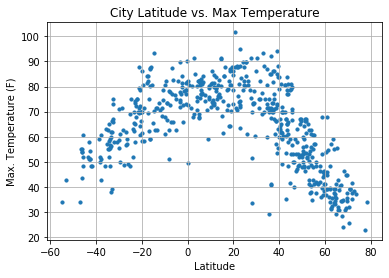

In [8]:

# Build scatterplot using column headers for hte X then Y Axis
plt.scatter(weatherDF['Latitude'], weatherDF['Temperature(F)'], marker='o', s=10)
# add other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# save graph
plt.savefig(os.path.join('temperature-VS-latitude.png'))
# Show graph
plt.show()

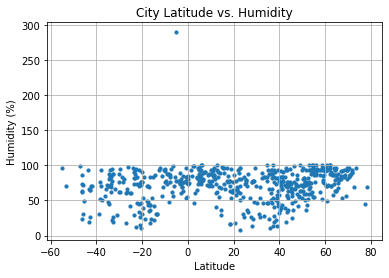

In [9]:

# Build a scatter plot for each data type
plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('humidity-VS-latitude.png'))
# Show plot
plt.show()

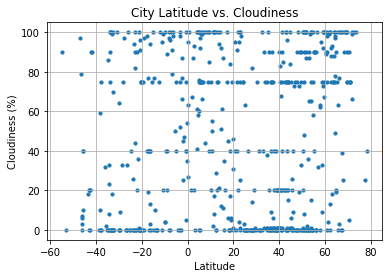

In [10]:

# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Cloud Density'], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('cloudDeinsity-VS-latitude.png'))
# Show plot
plt.show()

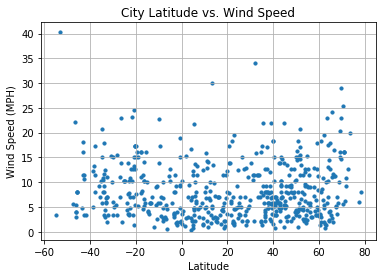

In [11]:

# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Wind(MPH)'], marker='o', s=10)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('windSpeed-VS-latitude.png'))
# Show plot
plt.show()

WeatherPy

Analysis

Weather becomes warmer when approaching the equator and pulling in data at this time of year shows that the Southern Hemisphere on average is warmer than the Northern, due to the tilt of the earth.
There is no strong correlation between latitude and cloudiness or wind.
It is interesting to see that there does not appear to be any correlation between Latitude and Humidity either, despite a clear correlation between Latitude and Temperature.